# Lab Maps

https://carmengg.github.io/eds-220-book/discussion-sections/ds3-earthquakes.html

In [1]:
# libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# import data
raw_eqk = pd.read_csv('https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv')
raw_eqk.head(2)

pd.set_option('display.max.columns',None)

# explore
raw_eqk.describe()

print(raw_eqk.columns)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'id', 'place', 'type'], dtype='object')


## 15.1.2 Data selection

1. Check which are the unique values for the type of earthquakes.
2. Select only data with with type equal to ‘eartquake’ and magnitude greater than or equal to 6.5.
3. Store this as a new dataframe called eqk.

In [14]:
# Check which are the unique values for the type of earthquakes.
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

In [20]:
# Select only data with with type equal to ‘eartquake’ and magnitude greater than or equal to 6.5.
# Store this as a new dataframe called eqk.

# Step 1: Select only observations earthquake
eqk =raw_eqk.loc[ raw_eqk.type=="earthquake" ]

# Step 2: Select only mag >= 6.5
eqk = eqk[eqk['mag'] >= 6.5]
eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
9062,2014-01-01 16:03:29.000,-13.8633,167.2490,187.00,6.5,usc000lvb5,"32km W of Sola, Vanuatu",earthquake
12142,2014-02-18 09:27:13.120,14.6682,-58.9272,14.83,6.5,usc000mskt,"172km NNE of Bathsheba, Barbados",earthquake
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.00,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake
15979,2014-02-07 08:40:13.550,-15.0691,167.3721,122.00,6.5,usc000mjye,"34km E of Port-Olry, Vanuatu",earthquake
17606,2014-02-02 09:26:37.820,-32.9076,-177.8806,44.26,6.5,usc000mfm0,"189km SSE of L'Esperance Rock, New Zealand",earthquake


## 15.1.3 pd.DataFrame to gpd.GeoDataFrame
Overwrite eqk dataframe as a geopandas.GeoDataFrame. HINT: find the CRS of the dataset by looking at the metadata.
Make a simple plot of the eqk data.

In [23]:
# overwrite as geodataframe

eqk = gpd.GeoDataFrame(eqk, #data
                                # specify geometry column 
                                geometry = gpd.points_from_xy(eqk.longitude,
                                                             eqk.latitude),   
                                # crs
                                crs='EPSG:4326'
                               )

<AxesSubplot:>

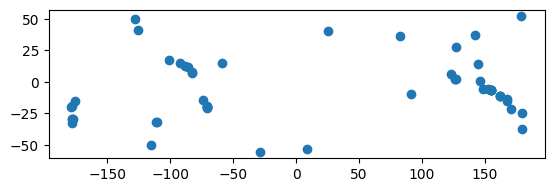

In [24]:
eqk.plot()

In [25]:
# 15.2 Import low-resolution countries polygons

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## 15.3 Map
Create a map of the earthquales of magnitude greater equal to 6.5 across the world in 2014. Color the points by the magnitude.

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


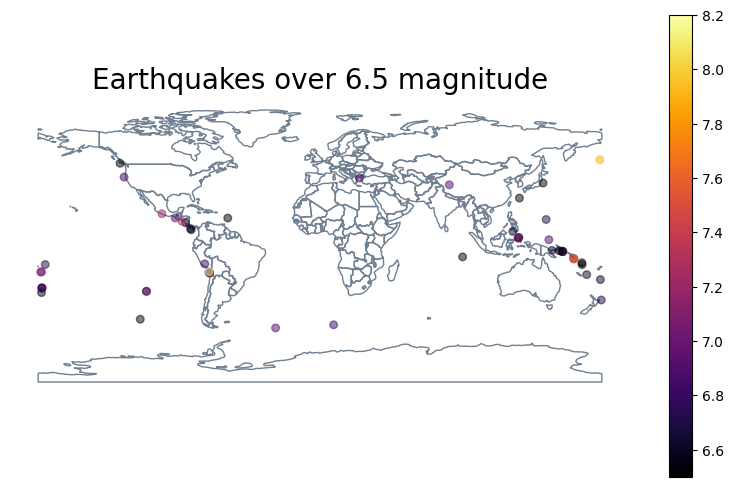

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))

# remove the axis box around the map
ax.axis('off')

# update title
ax.set_title('Earthquakes over 6.5 magnitude',
fontsize=20)

# add world plot
worldmap.plot(ax=ax,
            color='none',
            edgecolor = 'slategray')

# add eqks plants colored by mag
## continuous scale for continuous variable

eqk.plot(ax=ax, 
                  column='mag', # color points according to primsource value
                  legend=True,    # add legend
                  markersize = 30, # adjust point size
                  cmap='inferno', # use a continuous!
                  alpha=0.5)

plt.show()